**The main purpose of this tutorial is to highlight the importance of pre-processing steps we need to follow for any data analysis. Sometimes we tend to forget the syntax of python program for pre-processing. The dataset is used as per my convenience in showing the desired output. I am hopeful this tutorial will be a quick reference for everyone**

In [1]:
from pandas import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.stats import mode

import os
print(os.listdir("../input"))

['grades', 'pima-diabetes', 'mlcourse', 'iris-dataset']


In [2]:
diabetes = pd.read_csv('../input/pima-diabetes/diabetes.csv')

In [3]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Exploration

#### Check if the data types are as expected

In [4]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Memory Optimzations

In [5]:
memory = diabetes.memory_usage()
print(memory)
print("Total Memory Usage = ",sum(memory))

Index                         80
Pregnancies                 6144
Glucose                     6144
BloodPressure               6144
SkinThickness               6144
Insulin                     6144
BMI                         6144
DiabetesPedigreeFunction    6144
Age                         6144
Outcome                     6144
dtype: int64
Total Memory Usage =  55376


In [6]:
diabetes.iloc[:,0:9] = diabetes.iloc[:,0:9].astype('float16')

In [7]:
memory = diabetes.memory_usage()
print(memory)
print("Total Memory Usage = ",sum(memory))

Index                         80
Pregnancies                 1536
Glucose                     1536
BloodPressure               1536
SkinThickness               1536
Insulin                     1536
BMI                         1536
DiabetesPedigreeFunction    1536
Age                         1536
Outcome                     1536
dtype: int64
Total Memory Usage =  13904


## Check for Summary Statistics

In [8]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.843750,inf,69.125000,20.546875,79.812500,32.000000,0.471924,33.250000,0.348877
std,3.371094,31.968750,19.359375,15.953125,inf,7.882812,0.331299,11.757812,0.477051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078003,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.296875,0.243774,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372559,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.593750,0.626221,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.125000,2.419922,81.000000,1.000000


In [9]:
diabetes["Outcome"].value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

## Check for outliers

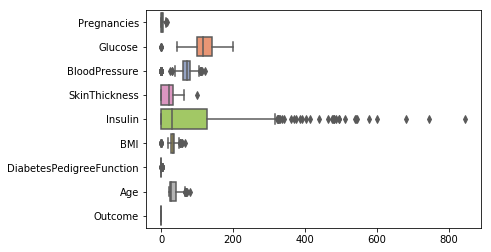

In [10]:
fig, axs = plt.subplots()
sns.boxplot(data=diabetes,orient='h',palette="Set2")
plt.show()

### Dealing with outliers

In [11]:
q75, q25 = np.percentile(diabetes["Insulin"], [75 ,25])
iqr = q75-q25
print("IQR",iqr)
whisker = q75 + (1.5*iqr)
print("Upper whisker",whisker)

IQR 127.25
Upper whisker 318.125


In [12]:
diabetes["Insulin"] = diabetes["Insulin"].clip(upper=whisker)

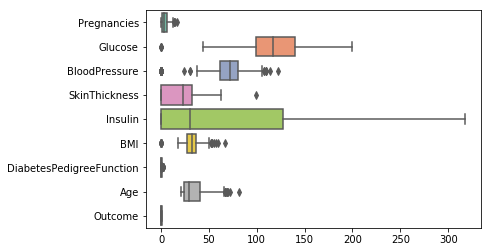

In [13]:
fig, axs = plt.subplots()
sns.boxplot(data=diabetes,orient='h',palette="Set2")
plt.show()

### Check missing values

In [14]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.593750,0.626953,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.593750,0.351074,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.296875,0.671875,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.093750,0.166992,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.093750,2.287109,33.0,1.0


In [15]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:

print((diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [17]:
diabetes.loc[:,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0, np.NaN)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.593750,0.626953,50.0,1.0
1,1.0,85.0,66.0,29.0,NaN,26.593750,0.351074,31.0,0.0
2,8.0,183.0,64.0,NaN,NaN,23.296875,0.671875,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.093750,0.166992,21.0,0.0
4,NaN,137.0,40.0,35.0,168.0,43.093750,2.287109,33.0,1.0


In [18]:
diabetes.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Dealing with missing values

## A. Drop rows having NaN

In [19]:
print("Size before dropping NaN rows",diabetes.shape,"\n")

nan_dropped = diabetes.dropna()

print(nan_dropped.isnull().sum())
print("\nSize after dropping NaN rows",nan_dropped.shape)

Size before dropping NaN rows (768, 9) 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Size after dropping NaN rows (336, 9)


## Drop row/columns having more than certain percentage of NaNs

In [20]:
diabetes.isnull().mean()

Pregnancies                 0.144531
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [21]:
print("Size before dropping NaN rows",diabetes.shape,"\n")

col_dropped = diabetes.loc[:, diabetes.isnull().mean() < .4]
row_dropped = diabetes.loc[diabetes.isnull().mean(axis=1) < .4, :]

print(nan_dropped.isnull().sum())
print("\nSize after dropping Columns with rows",col_dropped.shape)
print("Size after dropping Columns with rows",row_dropped.shape)

Size before dropping NaN rows (768, 9) 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Size after dropping Columns with rows (768, 8)
Size after dropping Columns with rows (752, 9)


### Imputing missing values

#### We can impute the missing values by many ways. Here are the 3 most common ways we can do

#### 1. Some constant value that is considered "normal" in the domain
#### 2. Summary statistic like Mean, Median, Mode
#### 3. A value estimated by algorithm or predictive model

### Binning

In [22]:
bins = [0,25,30,35,40,100]

group_names = ['malnutrition', 'Under-Weight', 'Healthy', 'Over-Wight',"Obese"]
diabetes['BMI_Class'] = pd.cut(diabetes['BMI'], bins, labels=group_names)
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Class
0,6.0,148.0,72.0,35.0,NaN,33.593750,0.626953,50.0,1.0,Healthy
1,1.0,85.0,66.0,29.0,NaN,26.593750,0.351074,31.0,0.0,Under-Weight
2,8.0,183.0,64.0,NaN,NaN,23.296875,0.671875,32.0,1.0,malnutrition
3,1.0,89.0,66.0,23.0,94.0,28.093750,0.166992,21.0,0.0,Under-Weight
4,NaN,137.0,40.0,35.0,168.0,43.093750,2.287109,33.0,1.0,Obese
5,5.0,116.0,74.0,NaN,NaN,25.593750,0.201050,30.0,0.0,Under-Weight
6,3.0,78.0,50.0,32.0,88.0,31.000000,0.248047,26.0,1.0,Healthy
7,10.0,115.0,NaN,NaN,NaN,35.312500,0.134033,29.0,0.0,Over-Wight
8,2.0,197.0,70.0,45.0,318.0,30.500000,0.157959,53.0,1.0,Healthy
9,8.0,125.0,96.0,NaN,NaN,NaN,0.232056,54.0,1.0,NaN


In [23]:
diabetes.dtypes

Pregnancies                  float16
Glucose                      float16
BloodPressure                float16
SkinThickness                float16
Insulin                      float16
BMI                          float16
DiabetesPedigreeFunction     float16
Age                          float16
Outcome                      float16
BMI_Class                   category
dtype: object

In [24]:
#Impute the values:
diabetes['BMI_Class'].fillna((diabetes['BMI_Class']).mode()[0], inplace=True)
diabetes['Insulin'].fillna((diabetes['Insulin']).mean(), inplace=True)
diabetes['Pregnancies'].fillna((diabetes['Pregnancies']).median(), inplace=True)

# #Now check the #missing values again to confirm:
print(diabetes.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
BMI_Class                     0
dtype: int64


### **Scaling**

In [25]:
vector = np.random.chisquare(1,500)
print("Mean",np.mean(vector))
print("SD",np.std(vector))
print("Range",max(vector)-min(vector))

Mean 0.9647631980848195
SD 1.3413651055719948
Range 10.642273328802778


In [26]:
from sklearn.preprocessing import MinMaxScaler
range_scaler = MinMaxScaler()
range_scaler.fit(vector.reshape(-1,1))
range_scaled_vector = range_scaler.transform(vector.reshape(-1,1))
print("Mean",np.mean(range_scaled_vector))
print("SD",np.std(range_scaled_vector))
print("Range",max(range_scaled_vector)-min(range_scaled_vector))

Mean 0.09065386362692232
SD 0.12604121921409944
Range [1.]


### Standardization


In [27]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(vector.reshape(-1,1))
std_scaled_vector = standardizer.transform(vector.reshape(-1,1))
print("Mean",int(np.mean(std_scaled_vector)))
print("SD",int(np.std(std_scaled_vector)))
print("Range",max(std_scaled_vector)-min(std_scaled_vector))

Mean 0
SD 1
Range [7.93391246]


### Dummification

In [28]:
dummified_data = pd.concat([diabetes.iloc[:,:-1],pd.get_dummies(diabetes['BMI_Class'])],axis=1)
dummified_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,malnutrition,Under-Weight,Healthy,Over-Wight,Obese
0,6.0,148.0,72.0,35.0,143.625,33.593750,0.626953,50.0,1.0,0,0,1,0,0
1,1.0,85.0,66.0,29.0,143.625,26.593750,0.351074,31.0,0.0,0,1,0,0,0
2,8.0,183.0,64.0,NaN,143.625,23.296875,0.671875,32.0,1.0,1,0,0,0,0
3,1.0,89.0,66.0,23.0,94.000,28.093750,0.166992,21.0,0.0,0,1,0,0,0
4,4.0,137.0,40.0,35.0,168.000,43.093750,2.287109,33.0,1.0,0,0,0,0,1


### Reshape

In [29]:
vector.shape

(500,)

In [30]:
row_vector = vector.reshape(-1,1)
row_vector.shape

(500, 1)

In [31]:
col_vector = vector.reshape(1,-1)
col_vector.shape

(1, 500)

In [32]:
matrix = vector.reshape(10,50)
matrix.shape

(10, 50)

### Pivot Table

In [33]:
#Determine pivot table
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                       "bar", "bar", "bar", "bar"],
                    "B": ["one", "one", "one", "two", "two",
                          "one", "one", "two", "two"],
                    "C": ["small", "large", "large", "small",
                          "small", "large", "small", "small",
                          "large"],
                    "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                    "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

In [34]:
df.head(3)

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5


In [35]:
table = pivot_table(df, values='D', index=['A', 'B'],
                  columns=['C'], aggfunc=np.sum)
table


C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html


### Crosstab

In [36]:
pd.crosstab(df["D"],df["B"],margins=True)

B,one,two,All
D,,,
1,1,0,1
2,2,0,2
3,0,2,2
4,1,0,1
5,1,0,1
6,0,1,1
7,0,1,1
All,5,4,9


### Merging dataframes

In [37]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                       index=[0, 1, 2, 3])
    

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                       index=[4, 5, 6, 7])
    

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                       'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                       index=[8, 9, 10, 11])
    

frames = [df1, df2, df3]

result = pd.concat(frames)

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

### Plotting

In [38]:
grade = pd.read_csv("../input/grades/Grade.csv")
grade.head()

,StudentId,English1,Math1,Science1,OverallPct1
0,1,67,78,30,58
1,2,52,72,67,64
2,3,66,56,55,59
3,4,30,42,44,39
4,5,56,53,48,52


In [39]:
grade.describe()

,StudentId,English1,Math1,Science1,OverallPct1
count,20.00000,20.000000,20.000000,20.00000,20.000000
mean,10.50000,60.150000,54.600000,52.65000,55.850000
std,5.91608,13.899167,13.188512,15.89861,8.975258
min,1.00000,30.000000,34.000000,30.00000,38.000000
25%,5.75000,51.000000,45.750000,39.25000,50.750000
50%,10.50000,64.000000,55.000000,54.00000,56.000000
75%,15.25000,70.250000,59.750000,66.25000,61.000000
max,20.00000,80.000000,78.000000,77.00000,70.000000


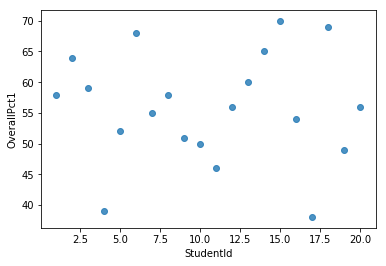

In [40]:
fig, axs = plt.subplots()
sns.regplot(x="StudentId",y="OverallPct1",data=grade,scatter=True,fit_reg=False)
plt.show()

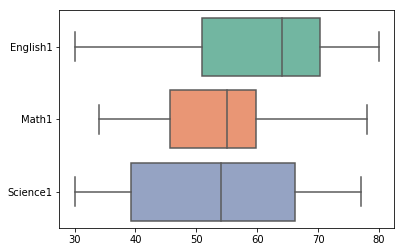

In [41]:
fig, axs = plt.subplots()
sns.boxplot(data=grade.iloc[:,1:-1],orient='h',palette="Set2")
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


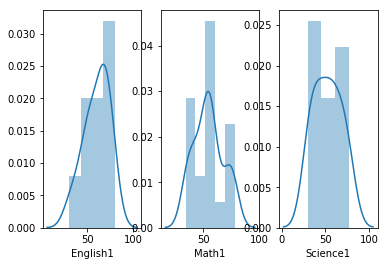

In [42]:
# Basic Plots
fig, axs = plt.subplots(ncols=3)
sns.distplot(grade['English1'],ax=axs[0])
sns.distplot(grade['Math1'],ax=axs[1])
sns.distplot(grade['Science1'],ax=axs[2])
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


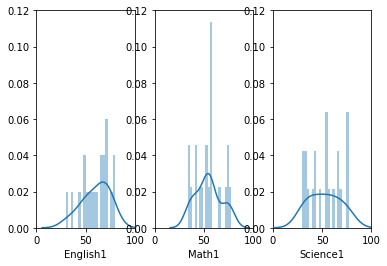

In [43]:
# Axis range and granularity are very important
fig, axs = plt.subplots(ncols=3)
sns.distplot(grade['English1'],ax=axs[0],bins=20)
sns.distplot(grade['Math1'],ax=axs[1],bins=20)
sns.distplot(grade['Science1'],ax=axs[2],bins=20)
axs[0].set_xlim(0,100)
axs[1].set_xlim(0,100)
axs[2].set_xlim(0,100)
axs[0].set_ylim(0,0.12)
axs[1].set_ylim(0,0.12)
axs[2].set_ylim(0,0.12)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


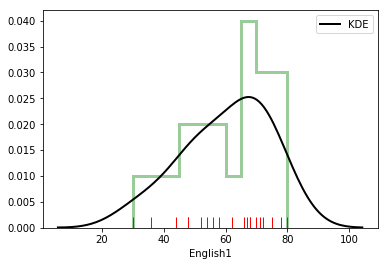

In [44]:
#Asthetics
fig, axs = plt.subplots()
sns.distplot(grade['English1'], bins=10, rug=True, rug_kws={"color": "red"},
             kde_kws={"color": "black", "lw": 2, "label": "KDE"},
             hist_kws={"histtype": "step", "lw": 3,"color": "green"})
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


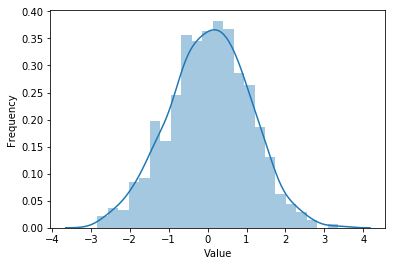

In [45]:
fig, axs = plt.subplots()
normal_dist = np.random.randn(1,1000)
normal_plot = sns.distplot(normal_dist)
normal_plot.set(xlabel='Value', ylabel='Frequency')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


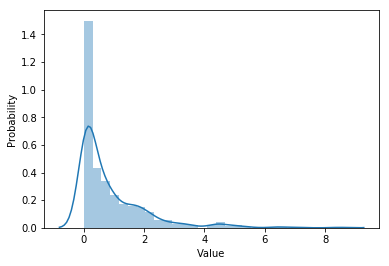

In [46]:
fig, axs = plt.subplots()
vector = np.random.chisquare(1,500)
vector_plot = sns.distplot(vector)
vector_plot.set(xlabel='Value', ylabel='Probability')
plt.show()

In [47]:
iris = pd.read_csv("../input/iris-dataset/Iris.csv")
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


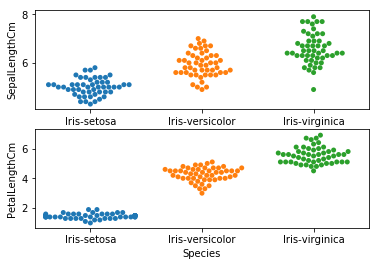

In [48]:
fig, axs = plt.subplots(nrows=2)
sns.swarmplot(x="Species", y="SepalLengthCm",ax=axs[0], data=iris)
sns.swarmplot(x="Species", y="PetalLengthCm",ax=axs[1], data=iris)
plt.show();

<Figure size 432x288 with 0 Axes>

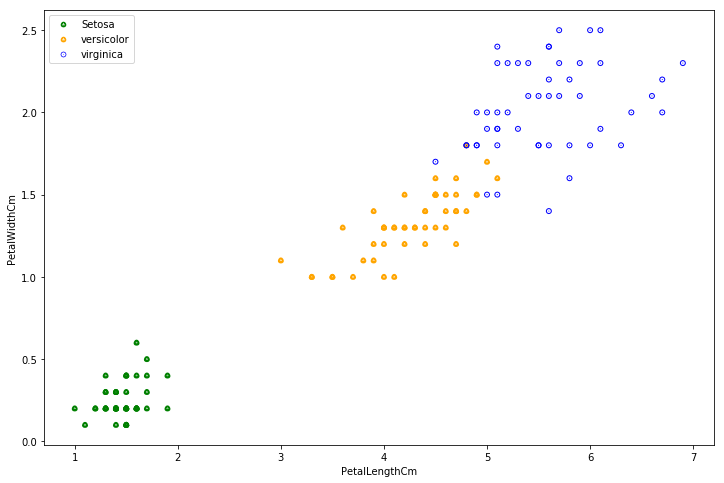

In [49]:
plt.figure(1)
plt.figure(figsize = (12,8))
plt.scatter(iris['PetalLengthCm'], iris['PetalWidthCm'], s=np.array(iris.Species == 'Iris-setosa'), marker='^', c='green', linewidths=5)
plt.scatter(iris['PetalLengthCm'], iris['PetalWidthCm'], s=np.array(iris.Species == 'Iris-versicolor'), marker='^', c='orange', linewidths=5)
plt.scatter(iris['PetalLengthCm'], iris['PetalWidthCm'], s=np.array(iris.Species == 'Iris-virginica'), marker='o', c='blue', linewidths=5)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend(loc = 'upper left', labels = ['Setosa', 'versicolor', 'virginica'])
plt.show();

**For other plots and exploratory data analysis, please refer to my kernel here.**

https://www.kaggle.com/shravankoninti/starter-code-and-eda-on-iris-species
![](http://)